In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset_train = pd.read_csv("//home/kritika/Desktop/Artifical Network/RNN/Google_Stock_Price_Train.csv")

In [4]:
training_set = dataset_train.iloc[:, 1:2].values

In [5]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
# Creating a data structure
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
# Build the RNN

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [9]:
regressor = Sequential()


regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


regressor.add(Dense(units = 1))

In [10]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

#epoch should be 100 , i have kept it 10 because it was taking so much time on my laptop
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
1198/1198 [==============================] - 29s 24ms/step - loss: 0.0375
Epoch 2/10
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0065
Epoch 3/10
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0059
Epoch 4/10
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0060
Epoch 5/10
1198/1198 [==============================] - 19s 15ms/step - loss: 0.0050
Epoch 6/10
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0039
Epoch 7/10
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0047
Epoch 8/10
1198/1198 [==============================] - 16s 14ms/step - loss: 0.0047
Epoch 9/10
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0042
Epoch 10/10
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0040


In [11]:
#another data set
dataset_test = pd.read_csv("//home/kritika/Desktop/Artifical Network/RNN/Google_Stock_Price_Test.csv")

In [12]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [13]:
#  predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [14]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [15]:
X_test.shape

(20, 60, 1)

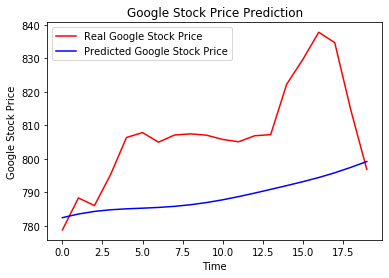

In [17]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()